In [2]:
import torch
from torch import nn
import  matplotlib.pyplot as plt


# check the python version
torch.__version__

'2.2.1+cu118'

## 1. Data(preparing and loading)


Data can almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songsand podcasts
* DNA
* Text

Machine learning is a goame of two parts:

1. Get data inot a numerical representation
2. Build a model to learn a patters in that numerical  model

To showcase this, let's create some *known* data using the linear regression formula

we'll use  a linear regression formula to make a straigth line with known **parameters**



In [3]:
# Create *Knowns* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Spliting data into training and test sets (one of the most important concept in machine learning)

Let's create a training and testing sets with our data


In [5]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):


    """
    Plosts trainig data, test data and copare predictions
    """
    plt.figure(figsize=(10,7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Trainig data")

    # Plot test data in greeen
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predctions, c="r",s=4, lablel="Predictions")
    
    # show the legend
    plt.legend(prop={"size":14})


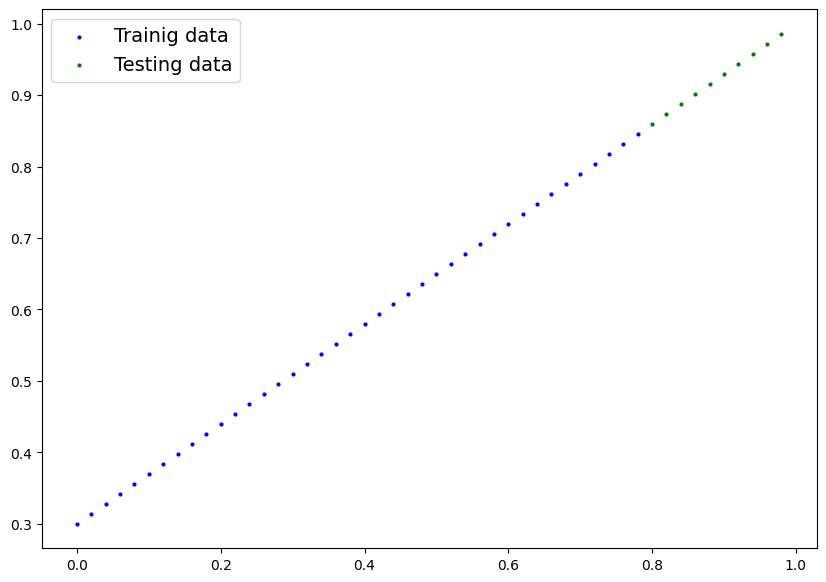

In [7]:
plot_predictions()

## 2. Build Model

In [8]:
from torch import  nn
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Mdoule
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                    requires_grad=True, 
                                    dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                    requires_grad=True,
                                    dtype=torch.float))
    # Forward method to define the compllation
    def forward(self, x:torch.Tensor) -> torch.Tensor:# <- "x" is the input data
        return self.weights* x + self.bias 
            


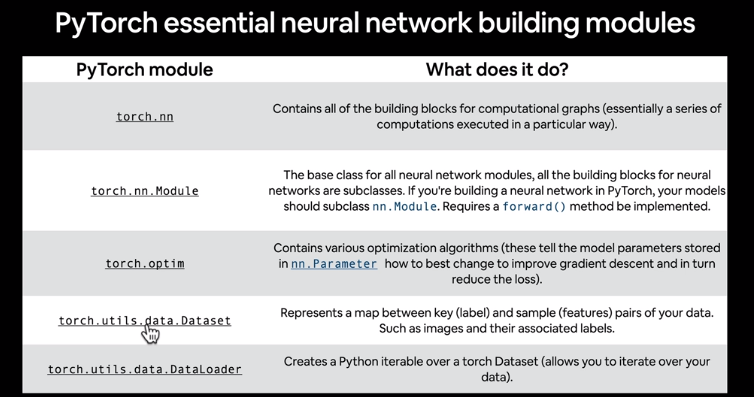